Unsupervised Learning

In [92]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
#Nos quedamos con las columnas que nos interesan(latitude, longitude, medInc)

clean_data = total_data[["MedInc", "Latitude", "Longitude"]]

clean_data

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [94]:
# Dividir dataset en train y test

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(clean_data, test_size = 0.2, random_state = 1)

X_train.head()

,MedInc,Latitude,Longitude
15961,3.1908,37.71,-122.43
1771,3.6094,37.95,-122.35
16414,2.6250,37.90,-121.24
5056,1.5143,34.02,-118.35
8589,7.3356,33.89,-118.39


Clasificar en 6 clusters con k-means

In [95]:
# Clasificar en 6 cluster con k-means
from sklearn.cluster import KMeans

model_kmean = KMeans(n_clusters = 6, n_init = "auto", random_state = 1)

#Entrenar el modelo K-Means
X_train['cluster'] = model_kmean.fit_predict(X_train)

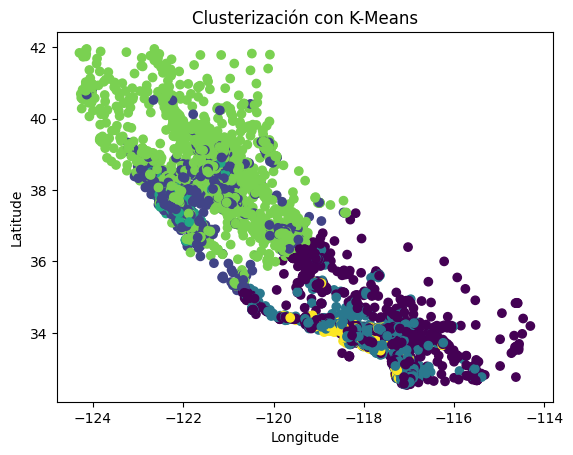

In [96]:
# Visualización de los clusters train con un plot

# Visualicación longitud y latitud
import matplotlib.pyplot as plt

plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusterización con K-Means')
plt.show()

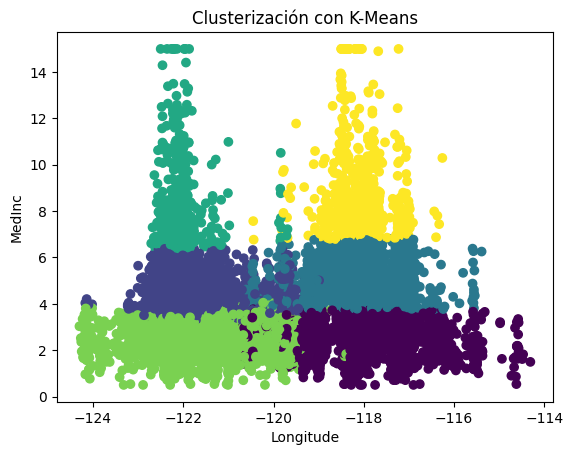

In [97]:
#Plot Longitud y MedInc
plt.scatter(X_train['Longitude'], X_train['MedInc'], c=X_train['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('MedInc')
plt.title('Clusterización con K-Means')
plt.show()

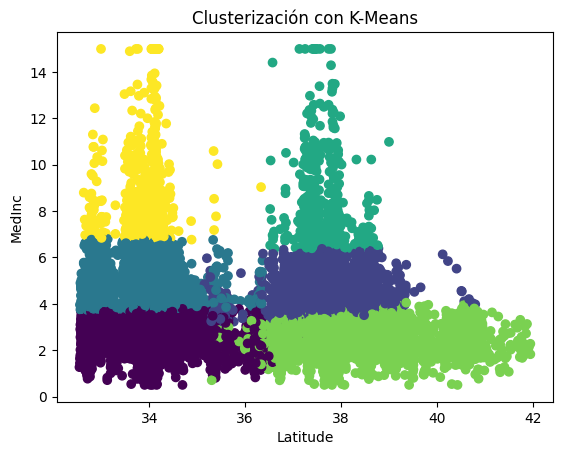

In [98]:
plt.scatter(X_train['Latitude'], X_train['MedInc'], c=X_train['cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('MedInc')
plt.title('Clusterización con K-Means')
plt.show()

Graficos predicciones en el conjunto test

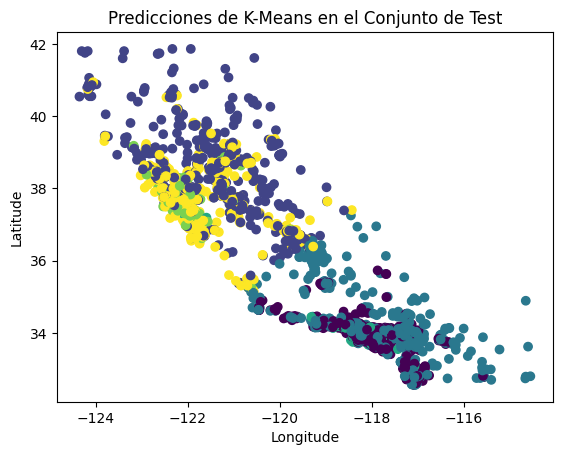

In [99]:
X_test['cluster'] = model_kmean.fit_predict(X_test)

# Gráfico longitud y latitud
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicciones de K-Means en el Conjunto de Test')
plt.show()

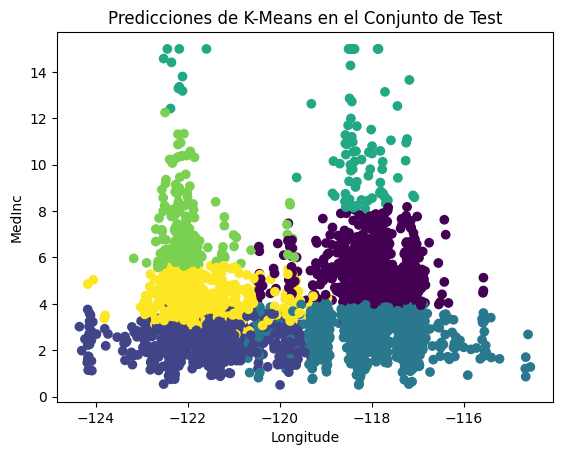

In [100]:
# Gráfico longitud y MedInc
plt.scatter(X_test['Longitude'], X_test['MedInc'], c=X_test['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('MedInc')
plt.title('Predicciones de K-Means en el Conjunto de Test')
plt.show()

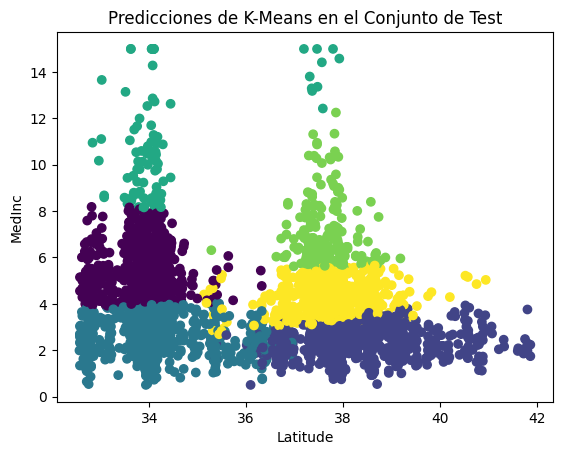

In [101]:
# Gráfico latitud y MedInc
plt.scatter(X_test['Latitude'], X_test['MedInc'], c=X_test['cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('MedInc')
plt.title('Predicciones de K-Means en el Conjunto de Test')
plt.show()

Gráfico 3D

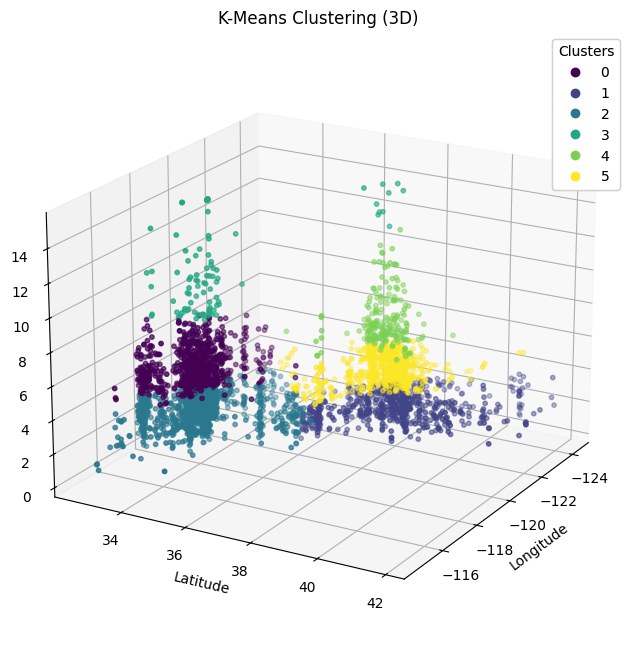

In [102]:
#Gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot for the complete set
scatter = ax.scatter(X_test['Longitude'], X_test['Latitude'], X_test['MedInc'], c=X_test['cluster'], cmap='viridis', s=10, label='Complete Set')
ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')

# Ángulo de vista
ax.view_init(elev=20, azim=30)  # elev = elevación (up/down) azimuth = (rotation around z-axis) 

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)
plt.show()

PROBAR EL DATASET CON ETIQUETADO (LABELED) CON UN RANDOMFOREST

In [140]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

X = clean_data, axis = 1
y = X_test['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



ValueError: Found input variables with inconsistent numbers of samples: [20640, 4128]